In [1]:
from models import GCN
import torch

In [2]:
retraining = torch.load('gcn_gll.pt')
no_retraining = torch.load('gcn_without.pt')

In [7]:
data_list = torch.load('./data/csbm/feat_01.pt')
full_graph = data_list[-1]
train_mask = torch.zeros(full_graph.x.size(0), dtype=torch.bool)
val_mask = torch.zeros(full_graph.x.size(0), dtype=torch.bool)
test_mask = torch.zeros(full_graph.x.size(0), dtype=torch.bool)
for data in data_list:
    indices = torch.where(data.train_mask)[0]
    train_mask[indices] = True
    
    indices = torch.where(data.val_mask)[0]
    val_mask[indices] = True
     
    indices = torch.where(data.test_mask)[0]
    test_mask[indices] = True
print(train_mask.sum().item())
print(val_mask.sum().item())
print(test_mask.sum().item())

30000
10000
10000


In [8]:
print(full_graph)

Data(x=[50000, 128], edge_index=[2, 149757], y=[50000], t=[50000], train_mask=[50000], val_mask=[50000], test_mask=[50000])


In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_features = full_graph.x.size(1)
num_classes = torch.unique(full_graph.y).numel()
print(num_features, num_classes)

128 16


In [11]:
import train

In [13]:
full_graph.train_mask = train_mask
full_graph.val_mask = val_mask
full_graph.test_mask = test_mask
gcn = GCN(num_features, num_classes).to(device)
result = []
train.train(gcn, full_graph.to(device), 0, False)
for data in data_list:
    acc = train.evaluate(gcn, data.subgraph(data.test_mask).to(device))
    result.append(acc)

In [14]:
result

[0.374, 0.468, 0.576, 0.654, 0.74, 0.804, 0.812, 0.817, 0.79, 0.7318]

In [15]:
print(retraining)

tensor([[0.8110, 0.7790, 0.7770, 0.7260, 0.6330, 0.5340, 0.3990, 0.2530, 0.1840,
         0.1100],
        [0.8290, 0.7950, 0.7990, 0.7660, 0.6830, 0.5760, 0.4420, 0.2650, 0.2190,
         0.1090],
        [0.8340, 0.8110, 0.8240, 0.7950, 0.7490, 0.6610, 0.5430, 0.3850, 0.3040,
         0.1620],
        [0.8050, 0.8010, 0.8260, 0.8070, 0.7640, 0.7050, 0.6140, 0.4460, 0.3830,
         0.2250],
        [0.7810, 0.7790, 0.8180, 0.8200, 0.8080, 0.7720, 0.7000, 0.5620, 0.4770,
         0.3030],
        [0.7070, 0.7350, 0.7770, 0.8000, 0.8130, 0.8110, 0.7560, 0.6680, 0.5790,
         0.4520],
        [0.5360, 0.6030, 0.6680, 0.7170, 0.7820, 0.7980, 0.7950, 0.7450, 0.7010,
         0.6250],
        [0.2710, 0.4180, 0.4890, 0.5690, 0.6590, 0.7480, 0.7950, 0.7900, 0.7800,
         0.7450],
        [0.1860, 0.3360, 0.4250, 0.4860, 0.6140, 0.7160, 0.7810, 0.8040, 0.7840,
         0.7670],
        [0.0580, 0.1690, 0.2280, 0.3260, 0.4430, 0.5930, 0.6920, 0.7790, 0.7940,
         0.8060]])


In [18]:
print(no_retraining)

tensor([[0.8270, 0.7910, 0.7650, 0.7230, 0.6320, 0.5290, 0.3830, 0.2410, 0.1680,
         0.0820],
        [0.8270, 0.7910, 0.7650, 0.7230, 0.6320, 0.5290, 0.3830, 0.2410, 0.1680,
         0.0820],
        [0.8270, 0.7910, 0.7650, 0.7230, 0.6320, 0.5290, 0.3830, 0.2410, 0.1680,
         0.0820],
        [0.8270, 0.7910, 0.7650, 0.7230, 0.6320, 0.5290, 0.3830, 0.2410, 0.1680,
         0.0820],
        [0.8270, 0.7910, 0.7650, 0.7230, 0.6320, 0.5290, 0.3830, 0.2410, 0.1680,
         0.0820],
        [0.8270, 0.7910, 0.7650, 0.7230, 0.6320, 0.5290, 0.3830, 0.2410, 0.1680,
         0.0820],
        [0.8270, 0.7910, 0.7650, 0.7230, 0.6320, 0.5290, 0.3830, 0.2410, 0.1680,
         0.0820],
        [0.8270, 0.7910, 0.7650, 0.7230, 0.6320, 0.5290, 0.3830, 0.2410, 0.1680,
         0.0820],
        [0.8270, 0.7910, 0.7650, 0.7230, 0.6320, 0.5290, 0.3830, 0.2410, 0.1680,
         0.0820],
        [0.8270, 0.7910, 0.7650, 0.7230, 0.6320, 0.5290, 0.3830, 0.2410, 0.1680,
         0.0820]])


In [19]:
print(sum(result) / 10)

0.6766800000000001


In [20]:
import matplotlib.pyplot as plt

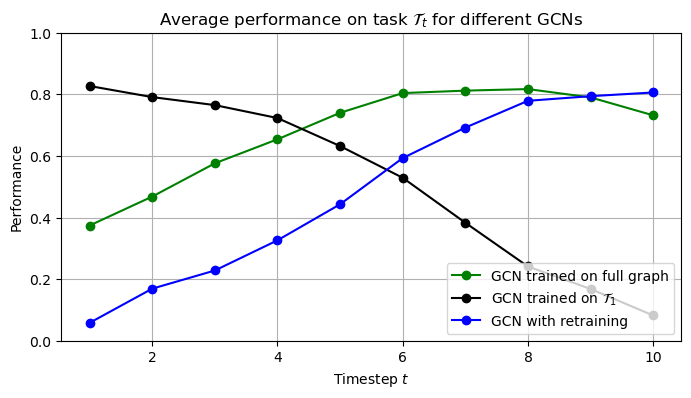

In [43]:
plt.figure(figsize=(8, 4))
x = list(range(1, 11))

# Plot the numbers
plt.plot(x, result, marker='o', linestyle='-', color='g', label='GCN trained on full graph')
plt.plot(x, no_retraining[0], marker='o', linestyle='-', color='black', label=r'GCN trained on $\mathcal{T}_{1}$')
plt.plot(x, retraining[-1], marker='o', linestyle='-', color='b', label=r'GCN with retraining')


# Add title and labels
plt.title(r'Average performance on task $\mathcal{T}_{t}$ for different GCNs')
plt.xlabel(r'Timestep $t$')
plt.ylabel('Performance')
plt.legend(loc='lower right')

plt.ylim(0, 1)
# Show the plot
plt.grid(True)
plt.savefig('baselines.pdf')
plt.show()